### 中级：实现VAE的变分推断(最好是手写推导)

#### 介绍VAE

VAE想解决的问题：如何构造编码器和解码器，使得图片能够编码成易于辨识的形态，并且这一形态能够尽可能无损的解码回原真实图像

VAE的基本思路：将真实样本通过编码器网络变换成理想数据分布，数据分布再传递给解码器网络从而得到生成样本，生成样本与真实样本足够接近时，则训练出自编码器模型。而VAE在自编码器的基础上进行变分处理，使得编码器的输出结果能对应到目标分布的均值和方差，如下图所示：

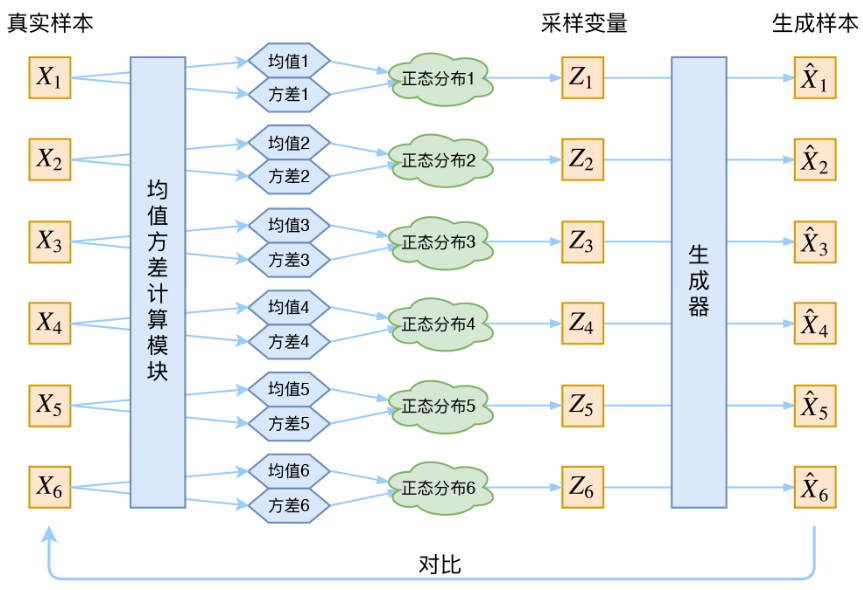

#### VAE的由来 

##### 前身：AE(AutoEncoder) 

  AE：通过自监督的训练方式，能够从原始特征获得一个潜在的特征编码，实现了自动化的特征工程，并且达到了降维和泛化的目的，它的网络结构很简单，由编码和解码两个部分组成：

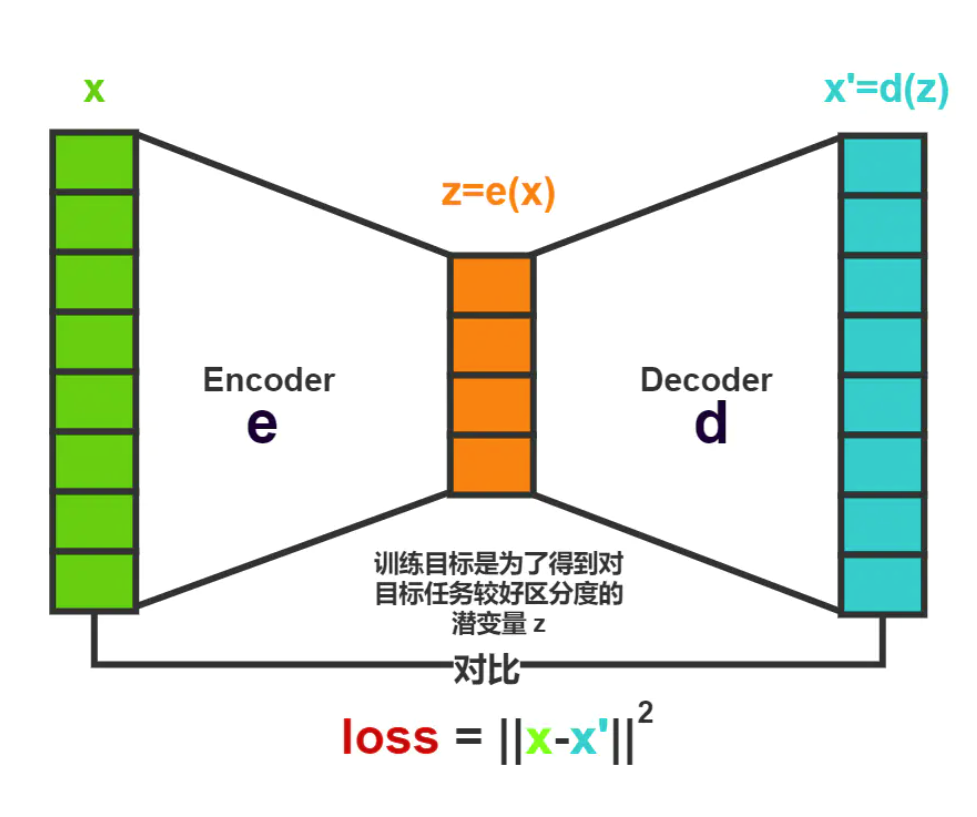

由上图可知，自监督的来源在于网络的target是input本身，因此不需要额外的标签工作。而AE的重点在于编码，即得到隐藏层的向量；解码的结果，基于训练目标，如果损失足够小的话，将会与input相同。

因此，AE模型在从输入到输出的整个过程中，都是基于已有训练数据的映射，隐藏层的概率分布只取决于训练数据的分布，从而导致隐藏状态空间的分布并不是连续的。于是如果随机生成隐藏层的状态，那么它经过解码将很可能不再具备输入特征的特点，因此很难通过解码器来生成数据。

##### 改进隐藏层，得到VAE(Variational AutoEncoder) 

可视化改进结果，如下图所示：

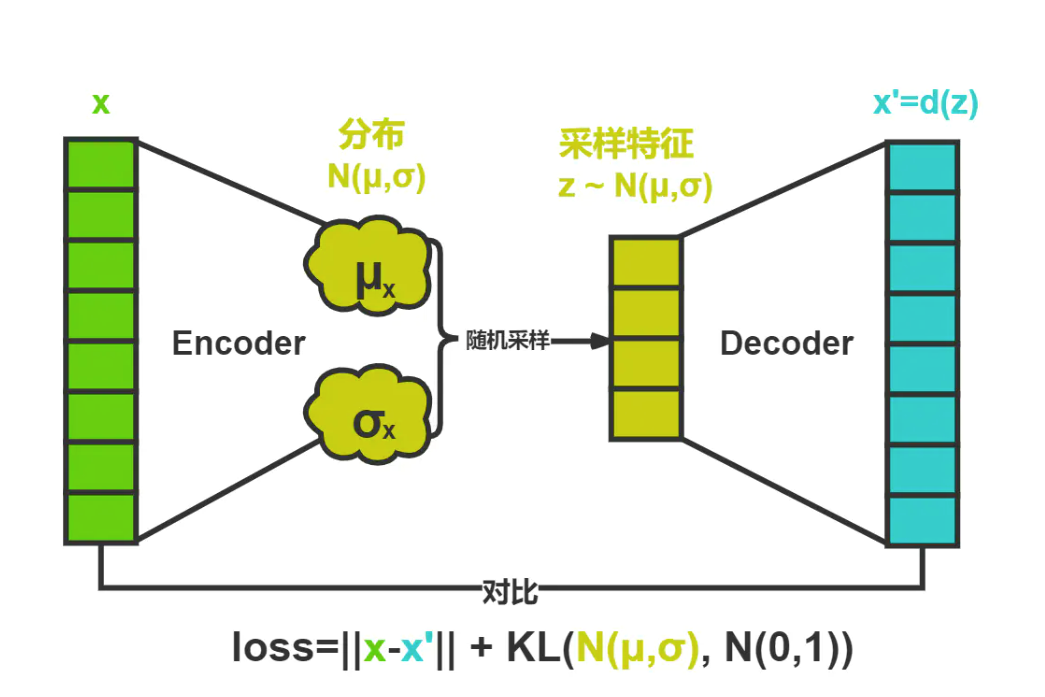

改进：VAE将经过神经网络编码后的隐藏层假设为一个标准的高斯分布，然后再从这个分布中采样一个特征，再用这个特征进行解码，期望得到与原始输入相同的结果，损失和AE几乎一样，只是增加编码推断分布与标准高斯分布的KL散度的正则项，从而防止模型退化成普通的AE

#### VAE的模型架构 

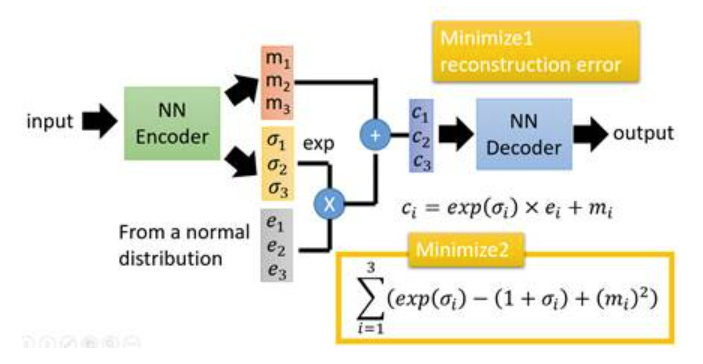

在$auto-encoder$ 中，编码器是直接产生一个编码的；
<br>
<br>
但是在 $ VAE $ 中，为了给编码添加合适的噪音，编码器会输出两个编码，一个是原有编码 $(m1,m2,m3)$，另外一个是控制噪音干扰程度的编码 $(σ1,σ2,σ3)$，第二个编码是为随机噪音码分配权重 $(e1,e2,e3)$，然后加上 $ exp(σi)$ 的目的是为了保证这个分配的权重是个正值，最后将原编码与噪音编码相加，就得到了 $VAE$ 在 $code$ 层的输出结果 $ (ci)$;
<br>
<br>
其它网络架构都与 $Deep Auto-encoder$ 无异

#### 变分推导 

##### VAE：将AE的编码与解码过程转化为贝叶斯概率模型

隐向量 $z$ 从先验分布 $p (z)$ 中采样得到，然后数据点 $x$ 从以 $z$ 为条件的分布 $p (x|z)$ 中产生。

因此生成观测变量过程便是似然分布（也就是解码器）：$p(x|z)$； 因而编码器是后验分布：$p(z|x) $ </p>
<br> 整个模型定义了数据和隐向量的联合分布 $p (x,z)=p (x|z) p (z)$

######  VAE变分推导依赖数学公式

* 贝叶斯公式
$$p(z|x)=\frac{p(x|z)p(z)}{p(x)}  $$ 
* 边缘概率公式
$$p(x)=\int_z^{}{p(z|x)\rm d}z  $$
* KL散度公式
$$KL(p||q))=\int^{}{p(x)log\frac{p(x)}{q(x)}\rm d}x$$

###### 具体推导 

根据贝叶斯公式,建立先验、后验和似然的关系：
<br>
*  公式（1）$$p(z|x)=\frac{p(x|z)p(z)}{p(x)}=\int_{z}^{}{\frac{p(x|z)p(z)}{p(x)}\rm d}z   $$ 

由于上述公式中，等号右边积分内的$p(x)$与$z$无关，$p(x)$可以单独提取出
* 公式（2）$$p(x)=p(x)\int_z^{}{p(z|x)\rm d}z  $$

而$\int_z^{}{p(z|x)\rm d}z=1$ 故对两边取 $log$，可得：
* 公式（3）
$$logp(x)=logp(x)\int_z^{}{p(z|x)\rm d}z  $$

由于$logp(x)$与z无关，我们可以把$logp(x)$放回到积分中去，得到:
* 公式（4）
$$logp(x)=\int_z^{}{p(z|x)logp(x)\rm d}z  $$

由于无法计算 $p(X)$ ，进而无法直接解出 $p(z|X)$ ,由此提出采用 $q(z|X)$ 近似$p(z|X)$。由于任意分布都可以用若干个高斯分布进行拟合，因此 VAE 假设 $q(z|X)$ 服从高斯分布，即 $$q(z|X)∼N(μ,\sigma^2)$$ 

* 公式（5）
$$logp(x)=logp(x)\int_z^{}{q(z|x)d}z=\int_z^{}{q(z|x)*logp(x)d}z$$
* 公式（6）
$$logp(x)=log\frac{p(x,z)}{p(z|x)}=logp(x,z)-logp(z|x)=log\frac{p(x,z)}{q(z|x)}-log\frac{p(z|x)}{q(z|x)}$$

同时对上述公式两侧乘以 $q(z|x)$ 并取积分得：
* 公式（7）
$$logp(x)=\int_z^{}{q(z|x)log\frac{p(x,z)}{p(z|x)}\rm d}z-\int_z^{}{q(z|x)log\frac{p(z|x)}{q(z|x)}\rm d}z$$

利用KL散度公式，根据公式（7）可推导出：
* 公式（8）
$$logp(x)=KL(q(z|x)||p(z|x))+\int_z^{}{q(z|x)log\frac{p(x|z)p(z)}{q(z|x)}\rm d}z$$

* 公式（9）
$$logp(x)=KL(q(z|x)||p(z|x))+\int_z^{}{q(z|x)logp(x|z)\rm d}z+\int_z^{}{q(z|x)log\frac{p(z)}{q(z|x)}\rm d}z$$

* 公式（10）
$$logp(x)=KL(q(z|x)||p(z|x))+E_{z ~ q(z|x)}[logp(x|z)]-KL(q(z|x)||p(z))$$

* 公式（11）
$$ ELBO=-KL(q(z|x)||p(z))+E_{z ~ q(z|x)}[logp(x|z)]$$

当样本数为n时，重构损失项为：

- 公式(12)
$$E_q[logp(x|z)]=\frac{1}{n}\sum_{i=0}^{n}{logp(x_i|z_i)}$$

改变 $q(z)$ 并不能影响 $logp(x)$ 的大小，而且$ logp(x)$ 大于 $ELBO$，那么欲似然  $logp(x)$ 更大，可从 $ELBO$ 下手，最大化 $ELBO$ 可以导出最大化 $logp(x)$ 

###### 进一步推导ELBO

VAE 假设 $q(z|X)$ 服从高斯分布，即 $q(z|X)∼N(μ,\sigma^2)$ 
* 公式（13）
$$ KL(q(z|x)||p(z))=KL(N(μ,\sigma^2))||N(0,1))$$
$$ =\int_{z}^{}{{\frac{1}{\sqrt{2\pi\sigma^2}}}[exp-{\frac{(z-\mu)^2}{2{\mu}^2}}][log(\frac{\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(z-\mu)^2}{2\sigma^2})}{\frac{1}{\sqrt{2\pi}}exp(-\frac{z^2}{2})})]\rm d}z$$
$$=\int_{z}^{}{{\frac{1}{\sqrt{2\pi\sigma^2}}}exp{\frac{-(z-\mu)^2}{2{\sigma}^2}}log({{\frac{1}{\sqrt{\sigma^2}}}exp{\frac{1}{2}}[x^2-{\frac{(z-\mu)^2}{\sigma^2}]}})\rm d}z$$
$$={\frac{1}{2}}\int_{z}^{}{{\frac{1}{\sqrt{2\pi\sigma^2}}}exp[{\frac{-(z-\mu)^2}{2{\sigma}^2}}][-log\sigma^2+x^2-{\frac{(z-\mu)^2}{\sigma^2}}]\rm d}z$$

$(\mu,\sigma^2)$二阶矩为$\mu^2+\sigma^2$，所以有：
* 公式（14）
$$KL(N(μ,\sigma^2)||N(0,I))=\frac{1}{2}(-1+\sigma^2+\mu^2-log\sigma^2)$$

当它们均为d元得高斯分布时，可以得到

* 公式(15):
$$KL(q(z|X)||p(z))=\sum_{i=1}^{d}{\frac{1}{2}(-1+(\sigma_{}^{i})^2+(\mu_{}^{i})^2-log(\sigma_{}^{i})^2)}$$

* 公式(16):

将公式(15)和公式(12)带入公式(11),得
$$ELBO=\frac{1}{n}\sum_{i=0}^{n}{logp(x_i|z_i)}+\sum_{i=1}^{d}{\frac{1}{2}(-log(\sigma_{}^{i})^2+(\sigma_{}^{i})^2+(\mu_{}^{i})^2-1)}$$

###### 证明结束

#### VAE的优缺点

##### VAE的优点

* 因为它使用潜在空间来学习图像的复杂分布，可以生成高质量的图像；
* 因为编码器可以将高维数据映射到低维的潜在空间，可以用于数据压缩；
* 因为可以将潜在空间看作是图像的特征表示，可以用于图像分类；
* VAE可以让我们随机生成隐含变量，还能够提高网络的泛化能力；
* VAE适合学习具有良好结构的潜在空间（连续性、低维度）

##### VAE的缺点

* 由于VAE使用变分推理来学习潜在变量的分布，这会使模型变得复杂从而难以训练；
* 因为在生成图像时，编码器和解码器之间存在噪声，因此生成的图像可能不够清晰；
* 由于VAE直接计算生成图片和原始图片的均方误差而不是像GAN那样去对抗来学习，因此图像清晰度较GAN低，由此可以考虑将GAN与VAE想结合从而提高模型精度。